### Experiments

#### Import Libraries

In [9]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#### Import Data

In [10]:
ETTm1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm1.csv")
training_df, test_df = split_dataset(ETTm1, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [11]:
p_lag = 192
future_steps = 96
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]
modelling_task = 'univariate'
n_continous_features=7
n_categorial_features=5
dataset_name = 'ETTm1'

#### ETTm2

#### RLinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Rlinear activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 14.652830569458008
Current (running) training loss at iteration 10000 : 12.647491944885253
Current (running) training loss at iteration 15000 : 11.583626331329345
Current (running) training loss at iteration 20000 : 10.96136561551094
Current (running) training loss at iteration 25000 : 10.02387185306549
Current (running) training loss at iteration 30000 : 9.59207246726354
Current (running) training loss at iteration 35000 : 8.956771932206834
Current (running) training loss at iteration 40000 : 8.271942178827524
Current (running) training loss at iteration 45000 : 7.875564763689042

Epoch 0: 

Train metrics: -------
Running (training) loss is 7.688646575352785.
Training MAE is 0.7402769811886692.
Training MSE is 7.6944731231305195.

Test metrics: -------
Running (test) loss is 7.629786997842347.
Test MAE is 0.7643313024376259.
Test MSE is 7.631791297911918.
---------------------------
Current learning rate is : 5e-05
------------------

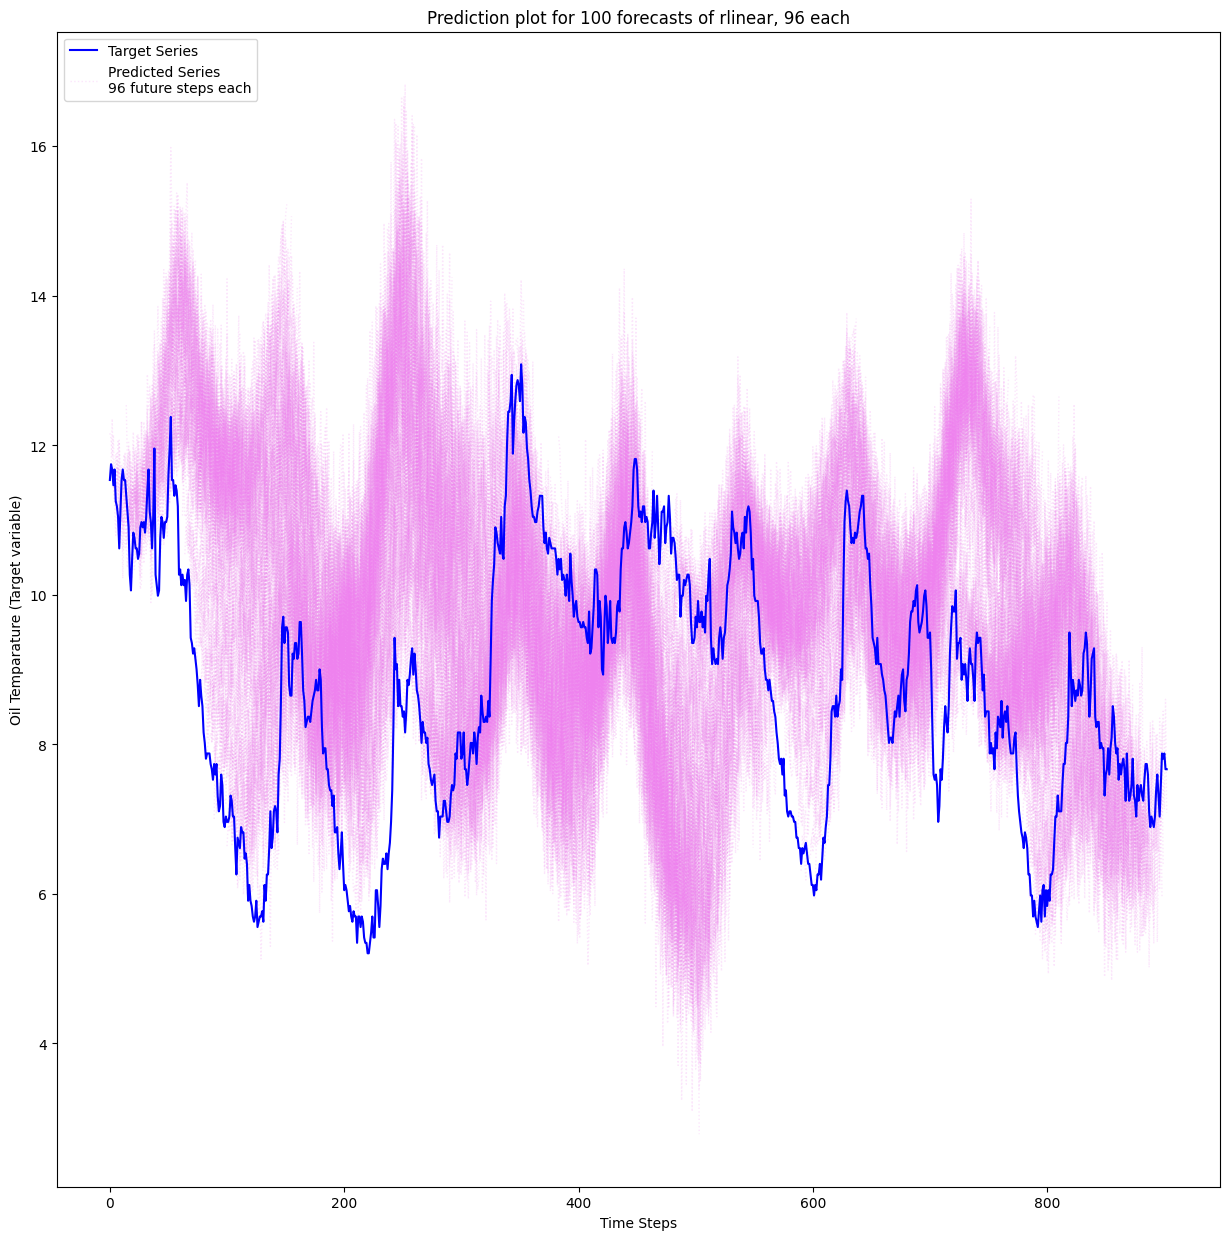

In [12]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### Dlinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Dlinear activated
Points to be estimated
With a shallow network
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 8.107572830200196
Current (running) training loss at iteration 10000 : 6.355956850624085
Current (running) training loss at iteration 15000 : 5.505227647908528
Current (running) training loss at iteration 20000 : 4.989089335870743
Current (running) training loss at iteration 25000 : 4.6889931099700926
Current (running) training loss at iteration 30000 : 4.715106989828746
Current (running) training loss at iteration 35000 : 4.599485269437517
Current (running) training loss at iteration 40000 : 4.810605507874489
Current (running) training loss at iteration 45000 : 4.95688407635159

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.94225127940735.
Training MAE is 0.6106200748804919.
Training MSE is 4.950310474838997.

Test metrics: -------
Running (test) loss is 38.60618763928403.
Test MAE is 1.7737399108139684.
Test MSE is 38.6100436495783.
---------------------------
Current learning rate is : 5e-05
-----------------------

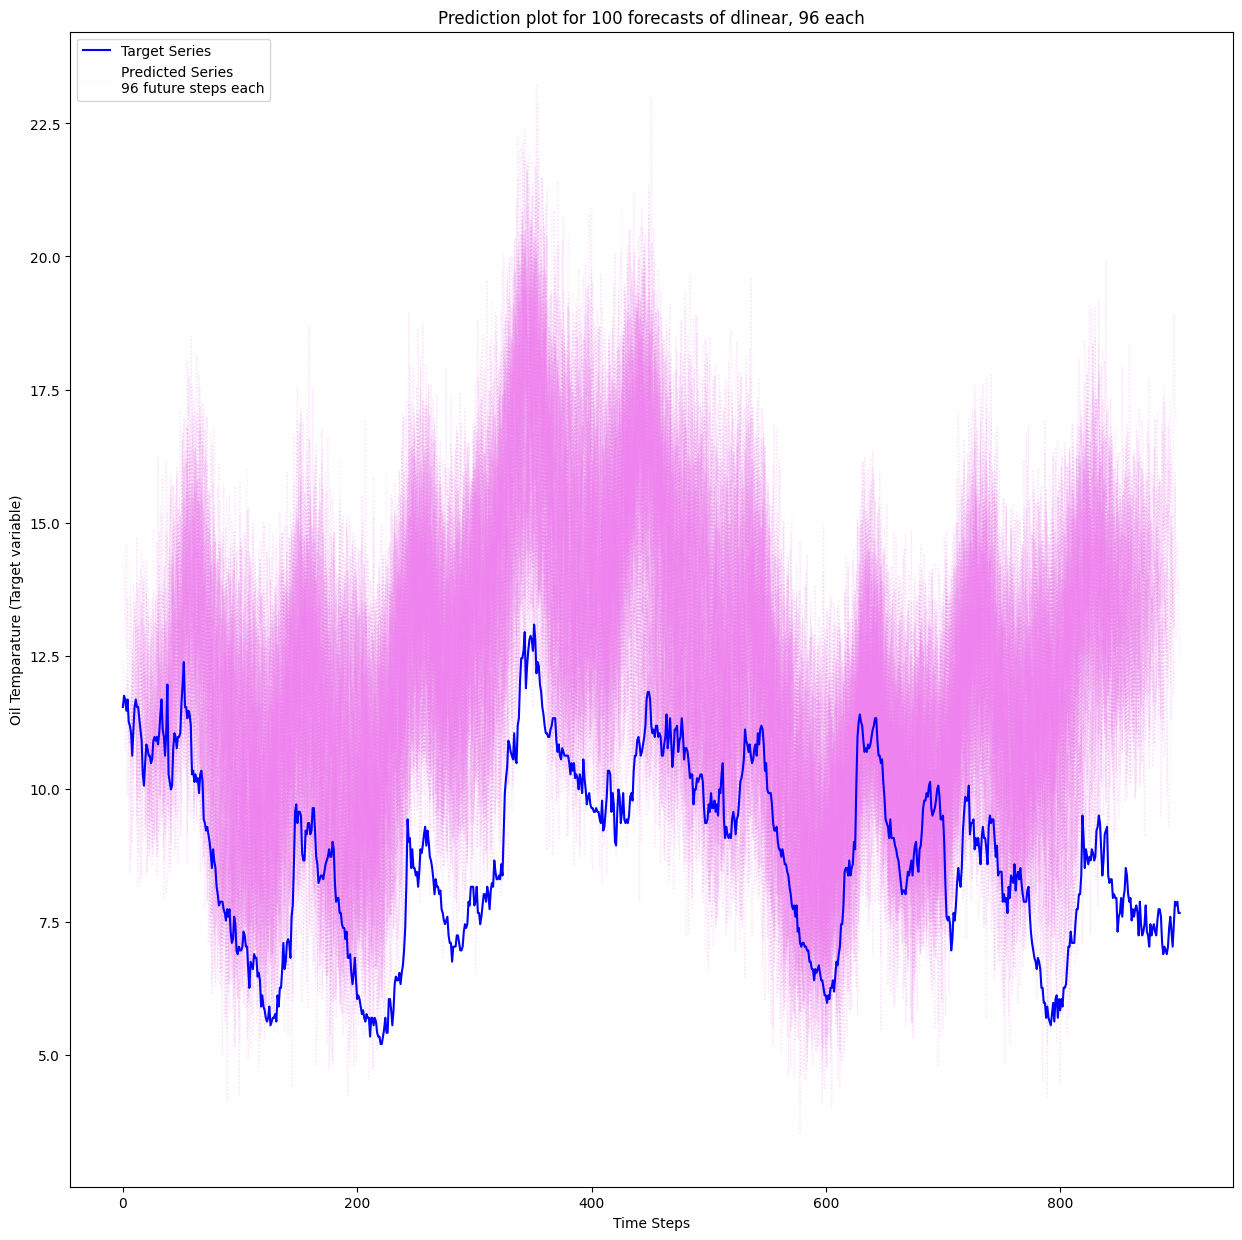

In [13]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'dlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### RLMP

Random seed set as 42
Univatiate modelling
inflation factor = 1
RMLP activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 25.380556700897216
Current (running) training loss at iteration 10000 : 18.90088137512207
Current (running) training loss at iteration 15000 : 15.591253177642823
Current (running) training loss at iteration 20000 : 13.282897380018234
Current (running) training loss at iteration 25000 : 11.312460787258148
Current (running) training loss at iteration 30000 : 10.187944089810054
Current (running) training loss at iteration 35000 : 9.261445777334485
Current (running) training loss at iteration 40000 : 8.39221416376233
Current (running) training loss at iteration 45000 : 7.882927359946569

Epoch 0: 

Train metrics: -------
Running (training) loss is 7.672408976039731.
Training MAE is 0.6915054311713402.
Training MSE is 7.678933546238953.

Test metrics: -------
Running (test) loss is 3.9145043494016547.
Test MAE is 0.5453928030671515.
Test MSE is 3.916538013106827.
---------------------------
Current learning rate is : 5e-05
----------------

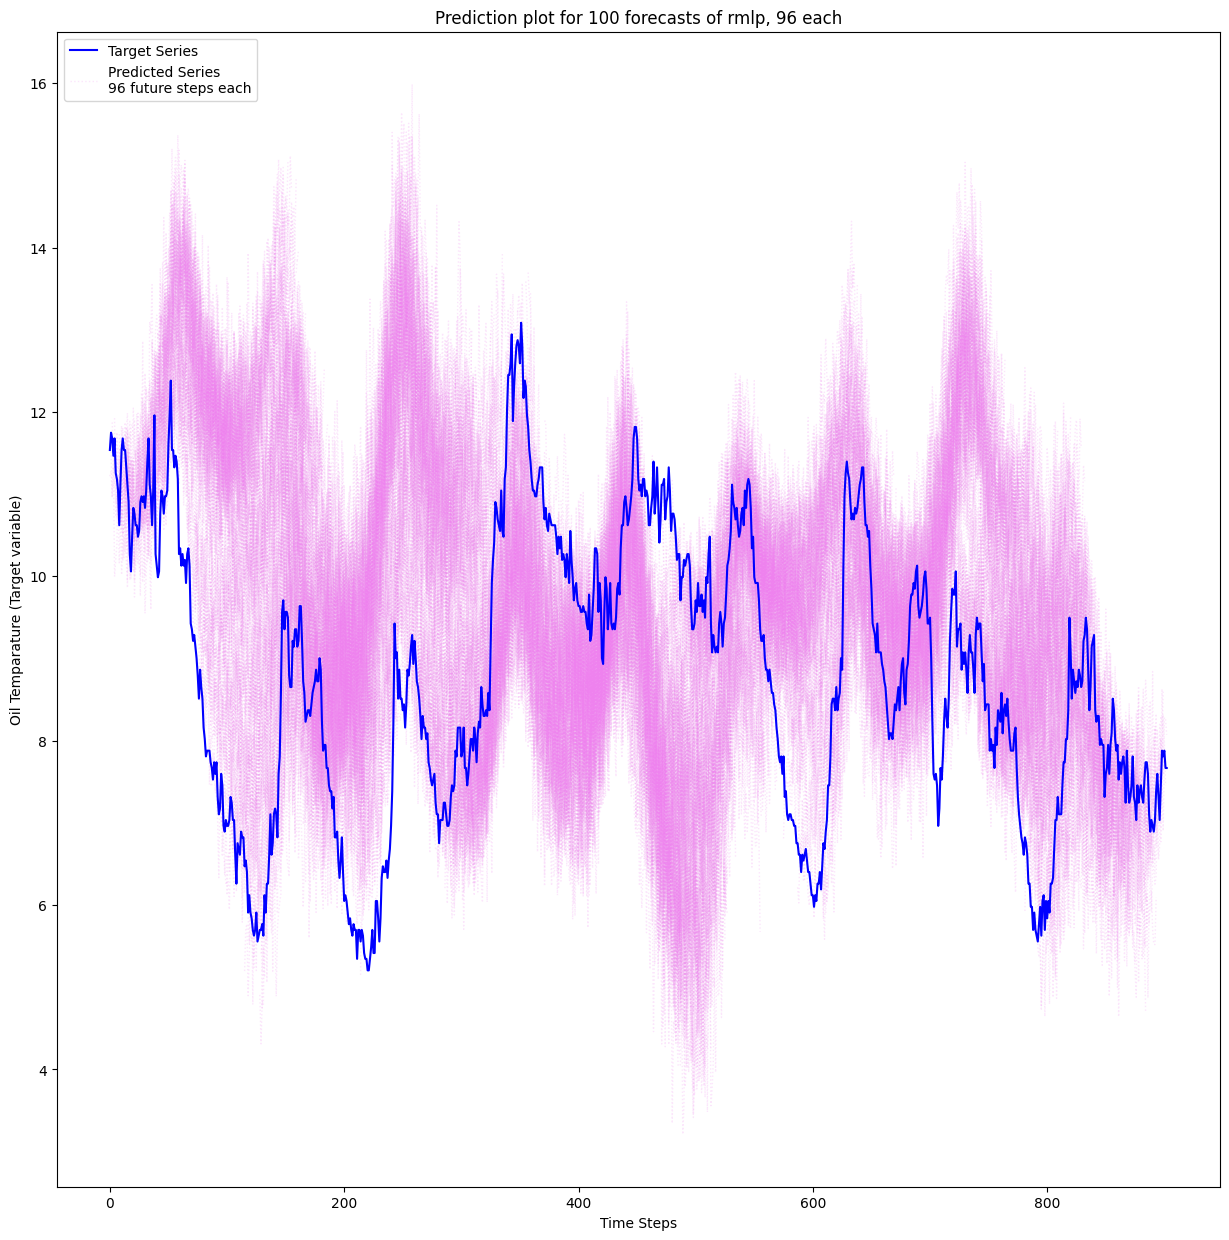

In [14]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rmlp', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)